<a href="https://colab.research.google.com/github/Sham2112/SAiDL-Winter-Assignment-2019/blob/master/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install batchup

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
from batchup import data_source
from torchvision import datasets

In [0]:
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

train_images = train_set.data.numpy()
train_labels = train_set.targets.numpy()

test_images = test_set.data.numpy()
test_labels = test_set.targets.numpy()

In [61]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
def one_hot(x):
    return np.array(x[:, None] == np.arange(10), dtype=np.float32)

trainimages = np.transpose(np.reshape(train_images, (train_images.shape[0], -1)))
trainlabels = np.transpose(one_hot(train_labels))

testimages = np.transpose(np.reshape(test_images, (test_images.shape[0], -1)))
testlabels = np.transpose(one_hot(test_labels))

In [63]:
print(trainimages.shape)
print(trainlabels.shape)
print(testimages.shape)
print(testlabels.shape)

(784, 60000)
(10, 60000)
(784, 10000)
(10, 10000)


In [0]:
n_x = 784
n_h = 350
n_y = 10

def init_params(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [0]:
def softmax(X):
    e = np.exp(X)
    return e/np.sum(e, axis=0)

def forward(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = softmax(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [0]:
def cross_entropy_loss(predictions, targets):
    m = targets.shape[1]
    ce = -np.sum(targets*np.log(predictions))
    return float(np.squeeze(ce))/m

In [0]:
def backward(parameters, X, Y, cache):
    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2-Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1,2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m


    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [0]:
def GradientDescentUpdate(parameters, grads, learning_rate = 0.1):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - (learning_rate*dW1)
    b1 = b1 - (learning_rate*db1)
    W2 = W2 - (learning_rate*dW2)
    b2 = b2 - (learning_rate*db2)

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [0]:
train_ds = data_source.ArrayDataSource([trainimages.T, trainlabels.T])
test_ds = data_source.ArrayDataSource([testimages.T, testlabels.T])

In [0]:
xo, yo = next(iter(train_ds.batch_iterator(batch_size = 64, shuffle=True)))

In [105]:
xo.shape

(64, 784)

In [0]:
parameters1 = init_params(n_x, n_h, n_y)

In [0]:
#Stochastic gradient descent
epochs = 25

def sgd_nn(dataloader,parameters, epochs):
    start_time = time.time()
    losses = []
    for e in range(epochs):
        for X, Y in dataloader.batch_iterator(batch_size = 64, shuffle=True):
            X = X.T
            Y = Y.T
            A2, cache = forward(X, parameters)
            loss = cross_entropy_loss(A2, Y)
            losses.append(loss)
            grads = backward(parameters, X, Y, cache)
            parameters = GradientDescentUpdate(parameters, grads, learning_rate = 0.001)

        print("Epoch: {} Loss {}".format(e, loss))

    train_time = time.time()-start_time
    return parameters, train_time, losses

In [117]:
parameters1, train_time1, losses1 = sgd_nn(train_ds, parameters1, epochs)

Epoch: 0 Loss 0.39711211806538893
Epoch: 1 Loss 0.3744861063187783
Epoch: 2 Loss 0.4146220456620112
Epoch: 3 Loss 0.1431468095430286
Epoch: 4 Loss 0.11739589977362908
Epoch: 5 Loss 0.18828769425592481
Epoch: 6 Loss 0.2071981910619422
Epoch: 7 Loss 0.11470620861555755
Epoch: 8 Loss 0.09709473341329665
Epoch: 9 Loss 0.23856538151831574
Epoch: 10 Loss 0.06821372129980983
Epoch: 11 Loss 0.11008710296815374
Epoch: 12 Loss 0.08435317732312328
Epoch: 13 Loss 0.17070315435956585
Epoch: 14 Loss 0.06257518803269382
Epoch: 15 Loss 0.32238591370814706
Epoch: 16 Loss 0.027016656087788082
Epoch: 17 Loss 0.06994451264555368
Epoch: 18 Loss 0.19552268986903126
Epoch: 19 Loss 0.07249462242062557
Epoch: 20 Loss 0.06640558898288289
Epoch: 21 Loss 0.20975866213979427
Epoch: 22 Loss 0.11017854907807254
Epoch: 23 Loss 0.09161116120878188
Epoch: 24 Loss 0.23649681544817086


Time taken using SGD:  210.78013968467712


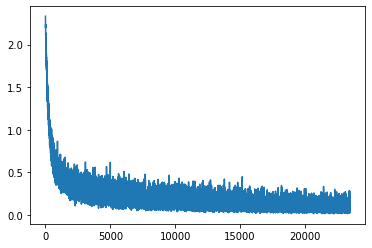

In [118]:
print("Time taken using SGD: ", train_time1)
plt.plot(losses1)

In [0]:
parameters2 = init_params(n_x, n_h, n_y)

In [0]:
def init_vel(parameters):
    v = {}
    v["dW1"] = np.zeros((parameters['W1'].shape[0],parameters['W1'].shape[1]))
    v["db1"] = np.zeros((parameters['b1'].shape[0],parameters['b1'].shape[1]))
    v["dW2"] = np.zeros((parameters['W2'].shape[0],parameters['W2'].shape[1]))
    v["db2"] = np.zeros((parameters['b2'].shape[0],parameters['b2'].shape[1]))
    
    return v

In [0]:
v = init_vel(parameters2)

In [0]:
def momentum(parameters, grads, v, beta, lr):
    v["dW1"] = (beta*v["dW1"]) + ((1-beta)*grads["dW1"])
    v["db1"] = (beta*v["db1"]) + ((1-beta)*grads["db1"])
    v["dW2"] = (beta*v["dW2"]) + ((1-beta)*grads["dW2"])
    v["db2"] = (beta*v["db2"]) + ((1-beta)*grads["db2"])

    parameters["W1"] = parameters["W1"] - lr*v["dW1"]
    parameters["b1"] = parameters["b1"] - lr*v["db1"]
    parameters["W2"] = parameters["W2"] - lr*v["dW2"]
    parameters["b2"] = parameters["b2"] - lr*v["db2"]

    return parameters, v

In [0]:
#Momentum
epochs = 25

def momentum_nn(dataloader,parameters, epochs, v):
    start_time = time.time()
    losses = []
    for e in range(epochs):
        for X, Y in dataloader.batch_iterator(batch_size = 64, shuffle=True):
            X = X.T
            Y = Y.T
            A2, cache = forward(X, parameters)
            loss = cross_entropy_loss(A2, Y)
            losses.append(loss)
            grads = backward(parameters, X, Y, cache)
            parameters , v = momentum(parameters, grads, v,beta=0.9, lr = 0.001)

        print("Epoch: {} Loss {}".format(e, loss))

    train_time = time.time()-start_time
    return parameters, train_time, losses

In [127]:
parameters2, train_time2, losses2 = momentum_nn(train_ds, parameters2, epochs, v)

Epoch: 0 Loss 0.5058047692332382
Epoch: 1 Loss 0.4233823999216262
Epoch: 2 Loss 0.34607753363229454
Epoch: 3 Loss 0.2081930640077501
Epoch: 4 Loss 0.30325618349083067
Epoch: 5 Loss 0.08989886508494717
Epoch: 6 Loss 0.22766009740993903
Epoch: 7 Loss 0.512676410332664
Epoch: 8 Loss 0.08233436277387043
Epoch: 9 Loss 0.10776370487447329
Epoch: 10 Loss 0.25267724976798467
Epoch: 11 Loss 0.11473273508858581
Epoch: 12 Loss 0.17713620213919803
Epoch: 13 Loss 0.12462636580328354
Epoch: 14 Loss 0.22834442505571836
Epoch: 15 Loss 0.11781289583641663
Epoch: 16 Loss 0.09637210212673754
Epoch: 17 Loss 0.1132540214685004
Epoch: 18 Loss 0.1229701820169207
Epoch: 19 Loss 0.09413838597666623
Epoch: 20 Loss 0.03785896910293099
Epoch: 21 Loss 0.1733254602806692
Epoch: 22 Loss 0.05919514979840687
Epoch: 23 Loss 0.07722988176980136
Epoch: 24 Loss 0.085451325562548


training time:  240.2959225177765


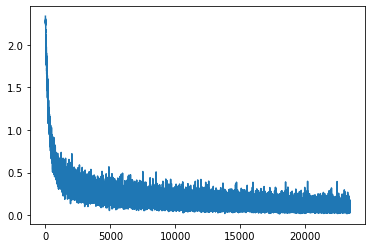

In [128]:
print("training time: ", train_time2)
plt.plot(losses2)

In [0]:
parameters3 = init_params(n_x, n_h, n_y)

In [0]:
def init_s(parameters):
    s = {}
    s["dW1"] = np.zeros((parameters['W1'].shape[0],parameters['W1'].shape[1]))
    s["db1"] = np.zeros((parameters['b1'].shape[0],parameters['b1'].shape[1]))
    s["dW2"] = np.zeros((parameters['W2'].shape[0],parameters['W2'].shape[1]))
    s["db2"] = np.zeros((parameters['b2'].shape[0],parameters['b2'].shape[1]))
    
    return s

In [0]:
s = init_s(parameters2)

In [0]:
def RMSProp(parameters, grads, s, beta, lr):
    s["dW1"] = (beta*s["dW1"]) + ((1-beta)*np.square(grads["dW1"]))
    s["db1"] = (beta*s["db1"]) + ((1-beta)*np.square(grads["db1"]))
    s["dW2"] = (beta*s["dW2"]) + ((1-beta)*np.square(grads["dW2"]))
    s["db2"] = (beta*s["db2"]) + ((1-beta)*np.square(grads["db2"]))

    parameters["W1"] = parameters["W1"] - (lr*grads["dW1"]/(np.sqrt(s['dW1']) + 1e-8))
    parameters["b1"] = parameters["b1"] - (lr*grads["db1"]/(np.sqrt(s['db1']) + 1e-8))
    parameters["W2"] = parameters["W2"] - (lr*grads["dW2"]/(np.sqrt(s['dW2']) + 1e-8))
    parameters["b2"] = parameters["b2"] - (lr*grads["db2"]/(np.sqrt(s['db2']) + 1e-8))

    return parameters, s

In [0]:
#RMSProp
epochs = 25

def rmsprop_nn(dataloader,parameters, epochs, s):
    start_time = time.time()
    losses = []
    for e in range(epochs):
        for X, Y in dataloader.batch_iterator(batch_size = 64, shuffle=True):
            X = X.T
            Y = Y.T
            A2, cache = forward(X, parameters)
            loss = cross_entropy_loss(A2, Y)
            losses.append(loss)
            grads = backward(parameters, X, Y, cache)
            parameters , v = RMSProp(parameters, grads, s , beta=0.999, lr = 0.0003)

        print("Epoch: {} Loss {}".format(e, loss))

    train_time = time.time()-start_time
    return parameters, train_time, losses

In [146]:
parameters3, train_time3, losses3 = rmsprop_nn(train_ds, parameters3, epochs, s)

Epoch: 0 Loss 0.38013931336113926
Epoch: 1 Loss 0.20376871519821815
Epoch: 2 Loss 0.2880707038319885
Epoch: 3 Loss 0.44979599576013735
Epoch: 4 Loss 0.11139193097902877
Epoch: 5 Loss 0.1837869818934954
Epoch: 6 Loss 0.18253426210844537
Epoch: 7 Loss 0.20930235089297627
Epoch: 8 Loss 0.06321435074922832
Epoch: 9 Loss 0.1765573803375068
Epoch: 10 Loss 0.25675273296092227
Epoch: 11 Loss 0.060613009192882886
Epoch: 12 Loss 0.19724151305593407
Epoch: 13 Loss 0.49707644219217456
Epoch: 14 Loss 0.1519617753572879
Epoch: 15 Loss 0.3291175786762429
Epoch: 16 Loss 0.1369129834100401
Epoch: 17 Loss 0.24112296459970628
Epoch: 18 Loss 0.18578700214566393
Epoch: 19 Loss 0.04156562602206419
Epoch: 20 Loss 0.10456993647395776
Epoch: 21 Loss 0.3474047332065453
Epoch: 22 Loss 0.03882068157462656
Epoch: 23 Loss 0.027107030392744105
Epoch: 24 Loss 0.10494654804678594


Time taken to train using RMSProp:  232.53596377372742


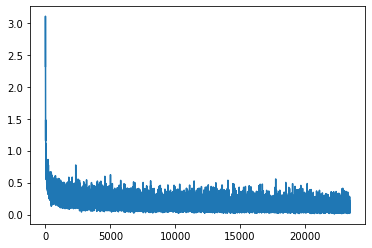

In [147]:
print("Time taken to train using RMSProp: ", train_time3)
plt.plot(losses3)

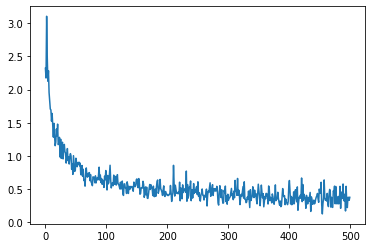

In [163]:
plt.plot(losses3[0:500])

In [0]:
#till now RMSProp has converged in the shortest period of time

In [0]:
parameters4 = init_params(n_x, n_h, n_y)

In [0]:
v1 = init_vel(parameters4)
s1 = init_s(parameters4)

In [0]:
def Adam(parameters, grads, v, s, beta1, beta2, t, lr):
    v["dW1"] = (beta1*v["dW1"]) + ((1-beta1)*grads["dW1"])
    v["db1"] = (beta1*v["db1"]) + ((1-beta1)*grads["db1"])
    v["dW2"] = (beta1*v["dW2"]) + ((1-beta1)*grads["dW2"])
    v["db2"] = (beta1*v["db2"]) + ((1-beta1)*grads["db2"])

    s["dW1"] = (beta2*s["dW1"]) + ((1-beta2)*np.square(grads["dW1"]))
    s["db1"] = (beta2*s["db1"]) + ((1-beta2)*np.square(grads["db1"]))
    s["dW2"] = (beta2*s["dW2"]) + ((1-beta2)*np.square(grads["dW2"]))
    s["db2"] = (beta2*s["db2"]) + ((1-beta2)*np.square(grads["db2"]))

    v_corrected = {}
    s_corrected = {}

    v_corrected["dW1"] = v["dW1"]/(1-beta1**t)
    v_corrected["db1"] = v['db1']/(1-beta1**t)
    v_corrected["dW2"] = v['dW2']/(1-beta1**t)
    v_corrected["db2"] = v['db2']/(1-beta1**t)

    s_corrected["dW1"] = s["dW1"]/(1-beta2**t)
    s_corrected["db1"] = s['db1']/(1-beta2**t)
    s_corrected["dW2"] = s['dW2']/(1-beta2**t)
    s_corrected["db2"] = s['db2']/(1-beta2**t)

    parameters["W1"] = parameters["W1"] - (lr*v_corrected["dW1"]/(np.sqrt(s_corrected['dW1']) + 1e-8))
    parameters["b1"] = parameters["b1"] - (lr*v_corrected["db1"]/(np.sqrt(s_corrected['db1']) + 1e-8))
    parameters["W2"] = parameters["W2"] - (lr*v_corrected["dW2"]/(np.sqrt(s_corrected['dW2']) + 1e-8))
    parameters["b2"] = parameters["b2"] - (lr*v_corrected["db2"]/(np.sqrt(s_corrected['db2']) + 1e-8))

    return parameters, v, s

In [0]:
#Adam
epochs = 25

def adam_nn(dataloader,parameters, epochs, v, s):
    start_time = time.time()
    losses = []
    for e in range(epochs):
        for X, Y in dataloader.batch_iterator(batch_size = 64, shuffle=True):
            X = X.T
            Y = Y.T
            A2, cache = forward(X, parameters)
            loss = cross_entropy_loss(A2, Y)
            losses.append(loss)
            grads = backward(parameters, X, Y, cache)
            parameters , v , s = Adam(parameters, grads, v, s, beta1=0.9, beta2=0.999, t=2, lr = 0.0003)

        print("Epoch: {} Loss {}".format(e, loss))

    train_time = time.time()-start_time
    return parameters, train_time, losses

In [160]:
parameters4, train_time4, losses4 = adam_nn(train_ds, parameters4, epochs, v1, s1)

Epoch: 0 Loss 0.19150445800128377
Epoch: 1 Loss 0.16189545181330295
Epoch: 2 Loss 0.10328060648012699
Epoch: 3 Loss 0.16064540991082266
Epoch: 4 Loss 0.12259348922358254
Epoch: 5 Loss 0.07086123338692946
Epoch: 6 Loss 0.04263452090285407
Epoch: 7 Loss 0.06328543747175809
Epoch: 8 Loss 0.13891731199557053
Epoch: 9 Loss 0.04761542695049572
Epoch: 10 Loss 0.09162180563669975
Epoch: 11 Loss 0.32186954754811914
Epoch: 12 Loss 0.07032517903634727
Epoch: 13 Loss 0.03732044079253471
Epoch: 14 Loss 0.173188033010754
Epoch: 15 Loss 0.11988950574713961
Epoch: 16 Loss 0.055560747555536895
Epoch: 17 Loss 0.08707754780603552
Epoch: 18 Loss 0.16090766925034009
Epoch: 19 Loss 0.02947253800720987
Epoch: 20 Loss 0.01982588703545203
Epoch: 21 Loss 0.06520429807961803
Epoch: 22 Loss 0.03420789934698157
Epoch: 23 Loss 0.06168908169480088
Epoch: 24 Loss 0.03698816660504376


Time taken by Adam:  358.88079738616943


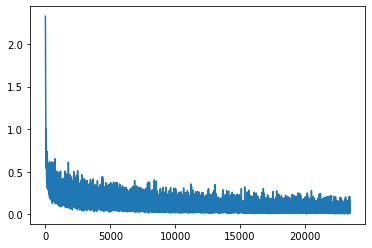

In [161]:
print("Time taken by Adam: ", train_time4)
plt.plot(losses4)

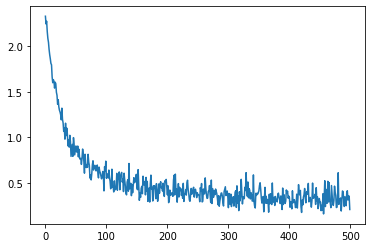

In [165]:
plt.plot(losses4[0:500])